<h1> Project 3: Super Online Shopper </h1>

<Most Popular Category>

<h>Jimmy Nguyen</h>

In [417]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path

In [423]:
# Read .csv file
purchases_df = pd.read_csv("Resources/Estimated_Purchases.csv.gz")
month_df = pd.read_csv("Resources/Month.csv.gz")
subcat_df = pd.read_csv("Resources/Sub_Category.csv.gz")
main_df = pd.read_csv("Resources/Main_Category.csv.gz")

#combine files
combined_df = pd.concat([purchases_df, main_df, month_df, subcat_df], axis=1)

In [ ]:
import matplotlib.pyplot as plt
combined_df_reset = combined_df.reset_index()
total_counts = combined_df_reset.groupby('MONTH')['MAIN_CATEGORY'].value_counts().unstack(fill_value=0).sum(axis=1)

plt.plot(total_counts.index, total_counts.values, marker='o', label='Total Main_Category Count')
plt.xlabel('Month')
plt.ylabel('Total Count of Categories (millions)')
plt.title('Count of Categories by Month')
plt.legend()
plt.show()

In [ ]:
unique_main_categories = combined_df['MAIN_CATEGORY'].unique()

print(unique_main_categories)

In [ ]:
import matplotlib.cm as cm
import numpy as np

combined_df_reset = combined_df.reset_index()
N = 10

top_categories = combined_df_reset['MAIN_CATEGORY'].value_counts().nlargest(N)

cmap = cm.get_cmap('Purples')
norm = plt.Normalize(0, max(top_categories.values))
colors = cmap(norm(top_categories.values))
min_lightness = 0.2 
colors[:, :3] = np.clip(colors[:, :3] - min_lightness, 0, 1)

plt.figure(figsize=(12, 8))
plt.barh(top_categories.index, top_categories.values, color=colors)
plt.xlabel('Count (millions)')
plt.ylabel('Catgories')
plt.title(f'Top {N} Categories')
plt.show()


<h1>Alternatives to UnZipping CSV.GZ files in Python</h1>

<h>Leslie Leiva</h>

In [ ]:
#Import Dependences
#import gzip
#import pandas as pd
#import csv
#import zipp

###########################################################
#Using the library gzip to open the compressed csv.gz file
###########################################################
#Takes up too much memory and closes program
#with gzip.open(file1, "rt", newline="", encoding="utf-8") as f:
    #reader_file1 = csv.reader(f)

###########################################################
#Method for opening Zip files
###########################################################
#with zipfile.ZipFile(file2) as z:
 #   with z.open(file2_csv) as f:
  #      subcategory = pd.read_csv(f,header=0,delimiter="\t")
   #     print(subcategory.head())

###########################################################
#Using Pandas to unzip files
###########################################################
#subcategory_df = pd.read_csv(file1,compression='gzip',header=0,sep='\t',quotechar='"')
#month_df = pd.read_csv(file2,compression='gzip',header=0,sep='\t',quotechar='"')
#category_df = pd.read_csv(file3,compression='gzip',header=0,sep='\t',quotechar='"')

#Merging tables
#month_cat_subcat = pd.concat([month_df,subcategory_df,category_df],ignore_index=True, sort=False)

#Convert Table to DataFrame
#month_cat_subcat_db = pd.DataFrame(month_cat_subcat)

#Drop NaN values in rows
#month_cat_subcat_db = month_cat_subcat_db.dropna()
#month_cat_subcat_db

In [3]:
#Give  variable to the csv files
file1 = "Resources/main_category.csv.gz"
file2 = "Resources/month.csv.gz"
file3 = "Resources/sub_category.csv.gz"

In [410]:
#Import Dependences
import gzip
import csv
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt

###########################################################
#Using the library gzip to open the compressed csv.gz file
with gzip.open(file1, "rt", newline="", encoding="utf-8") as f:
    reader_file1 = pd.read_csv(f)
with gzip.open(file2, "rt", newline="", encoding="utf-8") as f:
    reader_file2 = pd.read_csv(f)
with gzip.open(file3, "rt", newline="", encoding="utf-8") as f:
    reader_file3 = pd.read_csv(f)

#Merging tables
month_cat_subcat = pd.concat([month_df,subcategory_df,category_df],ignore_index=True, sort=False,axis=1)

month_cat_subcat = month_cat_subcat.dropna()

reader_db = pd.DataFrame(month_cat_subcat)

reader_db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30401260 entries, 21 to 32060678
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   0       int64 
 1   1       object
 2   2       object
dtypes: int64(1), object(2)
memory usage: 927.8+ MB


In [263]:
print(reader_db[0].unique())
print('- - '*30)
print(reader_db[1].unique())
print('- - '*30)
print(len(reader_db[2].unique()))

[1 5 6 2 3 4]
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
['Staples - Paper' 'Home - Office Supplies'
 'Home - Computers & Accessories' ... 'Handmade - '
 'Home & Business Services - Computers & Electronics'
 'Try Audible Free - ']
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
203


In [221]:
#Filters out theunnecessary variables like "NaN" from column
def filter_rows_by_variable(df,col,values):
    return df[~df[col].isin(values)]
    
#Use function to get the filtered table
clean_db = filter_rows_by_variable(month_cat_subcat,2,['Target',
                                                       'Our Brands',
                                                       'Feature',
                                                       'Seasonal',
                                                       'Walmart for Business',
                                                       'Shop by Video Game',
                                                       'Everything Else',
                                                       'Shop All Target Next Day Delivery',
                                                       'How to save 10%',
                                                       'Shop by Brand',
                                                       'Shop by Movie',
                                                       'Shop by TV Show',
                                                       'Character Shop',
                                                       'May 6-8 BOGO 30% all Pet Toys & Accessories with order pick up or delivery',
                                                       'NEW ARRIVALS',
                                                       'Try Audible Free',
                                                       'New',
                                                       'Amazon Explore',
                                                       'Amazon Elements',
                                                       'Target Next Day Delivery',
                                                       'Best Sellers',
                                                       'All Credit and Payment Cards',
                                                       'SUBSCRIPTION BOXES',
                                                       'Sales & Deals',
                                                       'About Pantry',
                                                       'The Big Style Sale',
                                                       'Custom Landing Pages',
                                                       'Purchase Circles'
                                                       'Shop All Target Next Day Delivery',
                                                       'SALES & DEALS',
                                                       'Shop by Seller',
                                                       'Best Buy',
                                                       'Services',
                                                       'Made By Design Organization',
                                                       'Department',
                                                       'Shop by brand',
                                                       'Included with Prime',
                                                       'Purchase Circles',
                                                       'About Amazon Coins',
                                                       'Credit & Payment Cards',
                                                       'Unlimited',
                                                       'Alexa Skills',
                                                       'Subscriptions'
                                                       ])


#Replace
clean_db[2] = clean_db[2].replace(['Clothing, Shoes & Jewelry',
                                   'Shoe, Jewelry & Watch Accessories',
                                   'Jewelry',
                                   'Clothing',
                                   'Shorts'],
                                  'Clothing, Shoes & Accessories')

clean_db[2] = clean_db[2].replace(['Fresh Produce',
                                   'Grocery & Gourmet Food',
                                   'Grocery',
                                   'Food',
                                   'Snacks',
                                   'Wine',
                                   'Frozen Foods'],
                                  'Groceries & Produce')

clean_db[2] = clean_db[2].replace(['Electronics',
                                   'Cell Phones & Accessories',
                                   'All Electronics',
                                   'Computers',
                                   'Amazon Devices',
                                   'GPS & Navigation',
                                   'Cell Phones',
                                   'Software',
                                   'Camera & Photo',
                                   'Apple Products',
                                   'Buy a Kindle',
                                   'Cell phones',
                                   'Home Audio & Theater',
                                   'Amazon Fire TV',
                                   'Amazon Devices & Accessories',
                                   'Landline Telephones'],
                                  'Electronics')

clean_db[2] = clean_db[2].replace(['Amazon Video',
                                   'Video Games',
                                   'Video games',
                                   'Movies & TV',
                                   'Fire Tablet Apps',
                                   'Apps & Games',
                                   'Video Shorts',
                                   'Prime Video',
                                   'Entertainment',
                                   'Portable Audio & Video',
                                   'Movies & TV Shows'],
                                  'Media & Entertainment')
                                   
clean_db[2] = clean_db[2].replace(['Health & Household',
                                   'Beauty & Personal Care',
                                   'All Beauty',
                                   'Health & Personal Care',
                                   'Beauty',
                                   'Health',
                                   'Personal Care',
                                   'Premium beauty',
                                   'Premium Beauty',
                                   'Luxury Beauty',
                                   'Personal care'],
                                  'Health & Beauty')

clean_db[2] = clean_db[2].replace(['Tools & Home Improvement',
                                   'Power & Hand Tools',
                                   'Home improvement',
                                   'Power Tool Parts & Accessories',
                                   'Home Services',
                                   'Outdoor Power Tools'],
                                  'Home Improvement')
                                   

clean_db[2] = clean_db[2].replace(['Musical Instruments',
                                   'CDs & Vinyl',
                                   'Amazon Music',
                                   'Amazon Music Unlimited',
                                   'Music on CD or Vinyl',
                                   'Instrument Accessories',
                                   'Portable Audio & Accessories',
                                   'Musical instruments',
                                   'Digital Music',
                                   'Music'],
                                  'Music & Instruments')
                                   
clean_db[2] = clean_db[2].replace(['Patio, Lawn & Garden',
                                   'Patio & Garden',
                                   'Patio & garden',
                                   'Outdoor Dinnerware',
                                   'Swing Set Accessories & Attachments',
                                   'Grills & Outdoor Cooking',
                                   'Lawn & Garden'],
                                  'Garden & Outdoor Living')
                                   
                                   
                                   
clean_db[2] = clean_db[2].replace(['Amazon Home',
                                   'Home & Kitchen',
                                   'Kitchen & Dining',
                                   'Dining & Entertaining',
                                   'Home',
                                   'Appliances',
                                   '["Home",">"]',
                                   '["Home","/"]',
                                   'Small Appliance Parts & Accessories',
                                   'Canvas & Wall Decor',
                                   'Household Essentials',
                                   'Household essentials',
                                   'Kitchen & Dining'],
                                  'Home & Decor')
                                   
clean_db[2] = clean_db[2].replace(['Remote & App Controlled Vehicle Parts',
                                   'Automotive',
                                   'Car Electronics',
                                   'Heavy Duty & Commercial Vehicles Parts',
                                   'Vehicles',
                                   'Auto & Tires',
                                   'Remote- & App-Controlled Vehicles & Parts',
                                   'Remote- & App-Controlled Vehicle Parts',
                                   'Remote & App Controlled Vehicles & Parts',
                                   'Auto & Tires',
                                   'Car & Vehicle Electronics',
                                   'Auto & tires',
                                   'Car & Vehicle Electronics',
                                   'Performance Parts & Accessories',
                                   'Motorcycle & Powersports'],
                                  'Automotive')
                                   
clean_db[2] = clean_db[2].replace(['Industrial & Scientific',
                                   'Food Service Equipment & Supplies',
                                   'Industrial & scientific',
                                   'Lab & Scientific Products',
                                   'Professional Dental Supplies',
                                   'Home & Business Services',
                                   'Janitorial & Sanitation Supplies',
                                   'Restaurant Appliances & Equipment',
                                   'Business Programs',
                                   'Heavy Duty & Commercial Vehicle Equipment'],
                                  'Industry Equipment')

clean_db[2] = clean_db[2].replace(['Medical Supplies & Equipment',
                                   'Pharmacy',
                                   'Mobility & Daily Living Aids'],
                                   'Medical & Pharmaceutical')
                                   
                                   

clean_db[2] = clean_db[2].replace(['Pet Supplies',
                                   'Pets'],
                                  'Pet Supplies')
                                   
                                   
clean_db[2] = clean_db[2].replace(['Books',
                                   'Audible Books & Originals',
                                   'Magazine Subscriptions',
                                   'Kindle Store',
                                   'Audible Membership',
                                   'Audible Audiobooks',
                                   'Comics Home',
                                   'Kindle eBooks'],
                                  'Books & eBooks')
                                   
                                   
                                   
clean_db[2] = clean_db[2].replace(['Sports & Outdoors',
                                   'Sports & Fitness',
                                   'Sports & outdoors',
                                   'Sports & Outdoor Recreation Accessories'],
                                  'Sports')
                                  

clean_db[2] = clean_db[2].replace(['Arts, Crafts & Sewing',
                                   'Arts Crafts & Sewing',
                                   'Hunting & Fishing',
                                   'Arts crafts & sewing',
                                   'Hobbies'],
                                  'Crafts & Hobbies')
                                   
                                   
clean_db[2] = clean_db[2].replace(['Online Learning',
                                   'Digital Educational Resources',
                                   'AWS Courses'],
                                  'Education')
                                   
 
clean_db[2] = clean_db[2].replace(['Photo Center',
                                   'Office Supplies',
                                   'Office supplies',
                                   'Office Products',
                                   'Staples',
                                   'Prints',
                                   'Office',
                                   'Calendars',
                                   'Office Electronics'],
                                  'Paper Products & Office Supplies')
                                   
clean_db[2] = clean_db[2].replace(['Toys & Games',
                                   'Toys',
                                   'Gift Cards',
                                   'Gifts & Registry'],
                                  'Toys & Gifts')
                                   
                                   
clean_db[2] = clean_db[2].replace(['Party & Occasions','Party & occasions'],'Celebrations')
                                   
clean_db[2] = clean_db[2].replace(['Baby test','Baby Products','Baby'],'Baby Products')

clean_db[2] = clean_db[2].replace(['Collectibles', 
                                  'Collectible Coins',
                                  'Sports Collectibles',
                                  'Collectibles & Fine Art',
                                  'Luxury Stores',
                                  'Handmade',
                                  'Handmade Products'],
                                  'Collectibles & Higher End Goods')
                                  
clean_db[2] = clean_db[2].replace(['Safety & Security',
                                   'Lighting Assemblies & Accessories',
                                   'Lights & Lighting Accessories'],
                                  'Security & Lighting')

                                   
                                   
                                   
clean_db.info()

/var/folders/dq/cb7fzmjn7jq_4w66x7drv9wm0000gn/T/ipykernel_6801/3164565311.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_db[2] = clean_db[2].replace(['Clothing, Shoes & Jewelry',
/var/folders/dq/cb7fzmjn7jq_4w66x7drv9wm0000gn/T/ipykernel_6801/3164565311.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_db[2] = clean_db[2].replace(['Fresh Produce',
/var/folders/dq/cb7fzmjn7jq_4w66x7drv9wm0000gn/T/ipykernel_6801/3164565311.py:69: SettingWithCopyWarning: 
A value is trying to be set on a 

<class 'pandas.core.frame.DataFrame'>
Index: 29543439 entries, 4866 to 32060678
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   0       int64 
 1   1       object
 2   2       object
dtypes: int64(1), object(2)
memory usage: 901.6+ MB


/var/folders/dq/cb7fzmjn7jq_4w66x7drv9wm0000gn/T/ipykernel_6801/3164565311.py:265: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_db[2] = clean_db[2].replace(['Safety & Security',


In [222]:
print(clean_db[2].unique())
print(len(clean_db[2].unique()))

['Groceries & Produce' 'Health & Beauty' 'Clothing, Shoes & Accessories'
 'Books & eBooks' 'Garden & Outdoor Living' 'Home Improvement'
 'Electronics' 'Media & Entertainment' 'Industry Equipment'
 'Music & Instruments' 'Automotive' 'Home & Decor' 'Pet Supplies' 'Sports'
 'Crafts & Hobbies' 'Toys & Gifts' 'Baby Products'
 'Paper Products & Office Supplies' 'Collectibles & Higher End Goods'
 'Medical & Pharmaceutical' 'Security & Lighting' 'Celebrations'
 'Education']
23


<h2>Group and Analyize Dataset</h2>

In [246]:
num_cat_db = clean_db.groupby([clean_db[2]]).count().sort_values(by=1)
#del cat_sub_group[0]

cat_sub_group

,1
2,
Education,943
Security & Lighting,2573
Medical & Pharmaceutical,16228
Celebrations,22399
Collectibles & Higher End Goods,66826
Baby Products,232197
Music & Instruments,428286
Industry Equipment,442828
Pet Supplies,539022


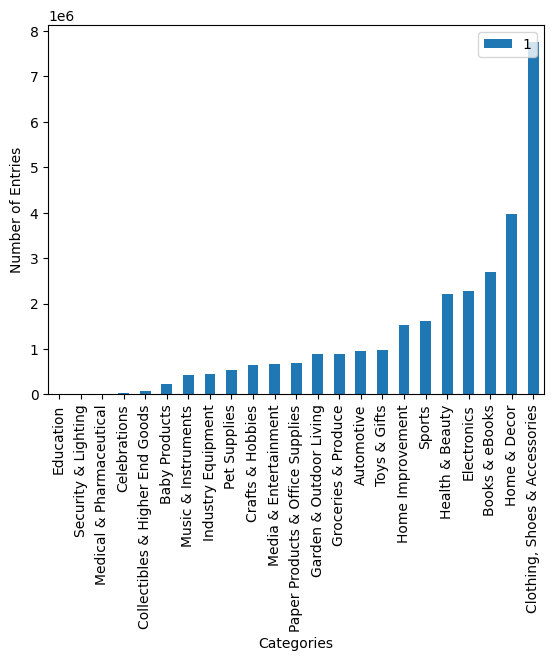

In [261]:
ax = cat_sub_group.plot.bar()

plt.xlabel('Categories',fontsize=10)
plt.ylabel('Number of Entries',fontsize=10)
plt.legend(loc='upper right')
#ax.bar_label(ax.containers[0])

#Labeling the bars in the graph
#for c in ax.containers:
 #   ax.bar_label(c, fmt=lambda x: f'{x:.0f}' if x>0 else'', label_type='center',fontsize=15)

#Save image 
plt.savefig("Category_Analysis_1.png")


In [347]:
cat_list = clean_db[2].unique()

#Create a list of each category
Groceries = clean_db[clean_db[2] == cat_list[0]]
Health_Beauty = clean_db[clean_db[2] == cat_list[1]]
Clothing = clean_db[clean_db[2] == cat_list[2]]
Books = clean_db[clean_db[2] == cat_list[3]]
Garden_Outdoor = clean_db[clean_db[2] == cat_list[4]]
Home_Improvement = clean_db[clean_db[2] == cat_list[5]]
Electronics = clean_db[clean_db[2] == cat_list[6]]
Media_Entertainment = clean_db[clean_db[2] == cat_list[7]]
Industry_Equipment = clean_db[clean_db[2] == cat_list[8]]
Music_Instruments = clean_db[clean_db[2] == cat_list[9]]
Automotive = clean_db[clean_db[2] == cat_list[10]]
Home = clean_db[clean_db[2] == cat_list[11]]
Pet_Supplies = clean_db[clean_db[2] == cat_list[12]]
Sports = clean_db[clean_db[2] == cat_list[13]]
Crafts_Hobbies = clean_db[clean_db[2] == cat_list[14]]
Toys_Gifts = clean_db[clean_db[2] == cat_list[15]]
Baby_Products = clean_db[clean_db[2] == cat_list[16]]
Paper_Office_Supplies = clean_db[clean_db[2] == cat_list[17]]
Collectibles_Goods = clean_db[clean_db[2] == cat_list[18]]
Medical = clean_db[clean_db[2] == cat_list[19]]
Security_Lighting = clean_db[clean_db[2] == cat_list[20]]
Celebrations = clean_db[clean_db[2] == cat_list[21]]
Education = clean_db[clean_db[2] == cat_list[22]]

In [382]:
subcat_num_1 =len(Groceries[1].unique()),
subcat_num_2 = len(Health_Beauty[1].unique()),
subcat_num_3 = len(Clothing[1].unique()),
subcat_num_4 = len(Books[1].unique()),
subcat_num_5 = len(Garden_Outdoor[1].unique()),
subcat_num_6 = len(Home_Improvement[1].unique()),
subcat_num_7 = len(Electronics[1].unique()),
subcat_num_8 = len(Media_Entertainment[1].unique()),
subcat_num_9 = len(Industry_Equipment[1].unique()),
subcat_num_10 = len(Music_Instruments[1].unique()),
subcat_num_11 = len(Automotive[1].unique()),
subcat_num_12 = len(Home[1].unique()),
subcat_num_13 = len(Pet_Supplies[1].unique()),
subcat_num_14 = len(Sports[1].unique()),
subcat_num_15 = len(Crafts_Hobbies[1].unique()),
subcat_num_16 = len(Toys_Gifts[1].unique()),
subcat_num_17 = len(Baby_Products[1].unique()),
subcat_num_18 = len(Paper_Office_Supplies[1].unique()),
subcat_num_19 = len(Collectibles_Goods[1].unique()),
subcat_num_20 = len(Medical[1].unique()),
subcat_num_21 = len(Security_Lighting[1].unique()),
subcat_num_22 = len(Celebrations[1].unique()),
subcat_num_23 =len(Education[1].unique())


num_subcat_in_cats = pd.DataFrame({
    'Groceries' : subcat_num_1,
    'Health & Beauty' : subcat_num_2,
    'Clothing, Shoes & Accessories' : subcat_num_3,
    'Books & eBooks' : subcat_num_4,
    'Garden & Outdoor Living' : subcat_num_5,
    'Home Improvement' : subcat_num_6,
    'Electronics' : subcat_num_7,
    'Media & Entertainment' : subcat_num_8,
    'Industry Equipment' : subcat_num_9,
    'Music & Instruments' : subcat_num_10,
    'Automotive': subcat_num_11,
    'Home & Decor' : subcat_num_12,
    'Pet Supplies' : subcat_num_13,
    'Sports' : subcat_num_14,
    'Crafts & Hobbies' : subcat_num_15,
    'Toys & Gifts' : subcat_num_16,
    'Baby Products' : subcat_num_17,
    'Paper Products & Office Supplies' : subcat_num_18,
    'Collectibles & Higher End Goods' : subcat_num_19,
    'Medical & Pharmaceutical' : subcat_num_20,
    'Security & Lighting' : subcat_num_21,
    'Celebrations' : subcat_num_22,
    'Education' : subcat_num_23
})

num_subcat_in_cats = num_subcat_in_cats.transpose()

num_subcat_in_cats.head()

,0
Groceries,1414
Health & Beauty,1666
"Clothing, Shoes & Accessories",2023
Books & eBooks,1684
Garden & Outdoor Living,1417


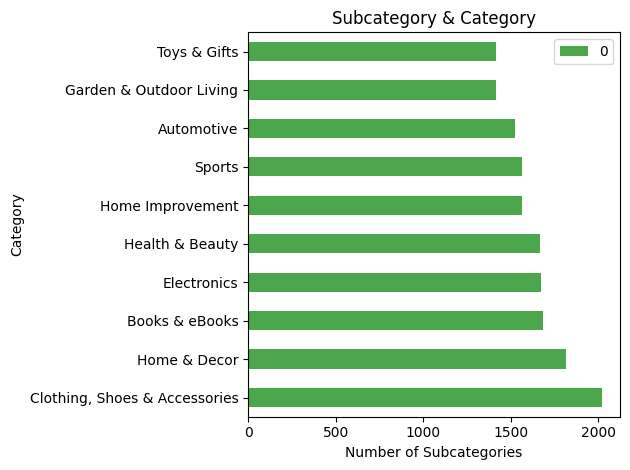

In [411]:
num_subcat_in_cats = num_subcat_in_cats.sort_values(by=0, ascending = False)

num_subcat_in_cats.head(10).plot.barh(color='green',
                                    alpha=0.7)
plt.xlabel('Number of Subcategories',fontsize=10)
plt.ylabel('Category',fontsize=10)
plt.title('Subcategory & Category')

plt.tight_layout()
#Save image 
plt.savefig("Category_Analysis_1.png")

<Axes: xlabel='0,2'>

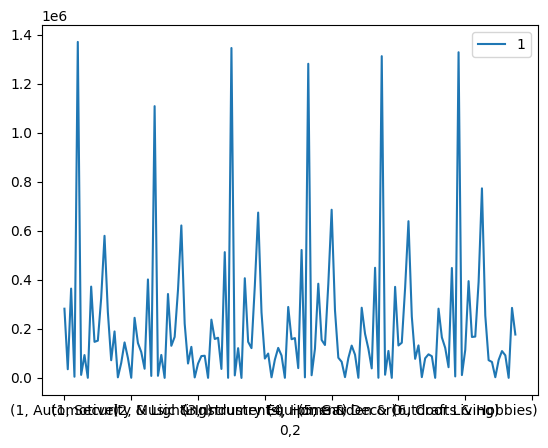

In [413]:
month_cat_db = clean_db.groupby([clean_db[0],clean_db[2]]).count()

month_cat_db.plot.line()

<h2>Utilizing Dask Library to Read Large Datasets [Incomplete]</h2>

In [ ]:
#Importing dependances and libraries
import dask.dataframe as dd
from dask.delayed import delayed
import dask
#from dask.distributed import LocalCluster

In [2]:
#Fully-featured Dask cluster on your local machine
#cluster = LocalCluster()
#client = cluster.get_client()

In [4]:
#Creating a list of file names
filenames=[file1,file2,file3]

#Delay reading of files using dask library
for i, fn in enumerate(filenames):
    table = dd.read_csv(fn,compression='gzip',
                        #Change type to Float64
                        dtype={'SUB_CATEGORY':'float64'},
                        blocksize=None)
    if i == 0:
         merged = table
    else:
        merged = dd.merge(merged, table, how="left")

#dir(merged)
merged.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 3 entries, SUB_CATEGORY to MAIN_CATEGORY
dtypes: float64(1), int64(1), string(1)

In [409]:
#clean the merged dataset by dropping N/A from Main_Category
cleaned_ddf = merged.dropna(subset=['MAIN_CATEGORY'])

cleaned_ddf.astype('float')

#Split large dataset into partitions in for low memory usage
cleaned_ddf = cleaned_ddf.repartition(npartitions=100000)

#dir
(cleaned_ddf['SUB_CATEGORY']).info()

AttributeError: 'Series' object has no attribute 'info'

In [75]:
#Remove spaces in entry
cleaned_ddf['SUB_CATEGORY'] = str(cleaned_ddf['SUB_CATEGORY']).replace(' ','').strip('')

#cleaned_ddf['SUB_CATEGORY'] = cleaned_ddf['SUB_CATEGORY'].strip(' ')

#cleaned_ddf['SUB_CATEGORY'] = cleaned_ddf['SUB_CATEGORY']

#View dataset
#dir(cleaned_ddf['SUB_CATEGORY']) #.info()
cleaned_ddf['SUB_CATEGORY']

Dask Series Structure:
npartitions=100000
    string
       ...
     ...  
       ...
       ...
Name: SUB_CATEGORY, dtype: string
Dask Name: getitem, 11 graph layers

In [67]:
#Iterrate through dataset to collect data and convert to sql
for row in cleaned_ddf.iterrows():
    column_values.add(cleaned_ddf[row])
    #If using Client scheduler
    #sql = client.persist(column_values)
    
    #W/O Client scheduler
    sql = column_values.compute
    sql = sql.to_sql
    sql = str(sql)

#Save file to sql
with open('Dataset.sql','w') as file:
    file.write(sql)

ValueError: could not convert string to float: 'Staples - Paper'